<a href="https://colab.research.google.com/github/GurvGupta/Twitter_Sentiment_analysis/blob/main/SMILE_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('/smile-annotations-final.csv')
df.sample()

,611857364396965889,@aandraous @britishmuseum @AndrewsAntonio Merci pour le partage! @openwinemap,nocode
2967,612284932057075712,@steakandhonour @kettlesyard are you out tonight?,not-relevant


In [ ]:
df.columns = ['id','text','category']
df.category.value_counts()

nocode               1571
happy                1137
not-relevant          214
angry                  57
surprise               35
sad                    32
happy|surprise         11
happy|sad               9
disgust|angry           7
disgust                 6
sad|disgust             2
sad|angry               2
sad|disgust|angry       1
Name: category, dtype: int64

In [ ]:
df = df[~df.category.str.contains('\|')]
df = df[df.category != 'nocode']

df.category.value_counts()

happy           1137
not-relevant     214
angry             57
surprise          35
sad               32
disgust            6
Name: category, dtype: int64

In [ ]:
possible_labels = df.category.unique()
possible_labels

array(['happy', 'not-relevant', 'angry', 'disgust', 'sad', 'surprise'],
      dtype=object)

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label]=index

In [ ]:
label_dict

{'happy': 0,
 'not-relevant': 1,
 'angry': 2,
 'disgust': 3,
 'sad': 4,
 'surprise': 5}

In [ ]:
df['label'] = df.category.replace(label_dict)

In [ ]:
df.sample(6)

,id,text,category,label
1668,608684381356617729,@CamUnivMuseums Our favourite is @computermuse...,happy,0
1525,613741905910845440,"@WeesyT no problem, I am enjoying the amazing ...",happy,0
1518,610778682374930433,. @GavinGrindon @NationalGallery have we recei...,not-relevant,1
2969,614390134411165696,@britishmuseum Beautiful exhibit. I wish to ha...,happy,0
1717,611876159115149312,@jbenedictbrown @kettlesyard Such a lovely spa...,happy,0
3063,612681921638834176,Hello Cambridge. You were fun today &amp; fed ...,happy,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributio')

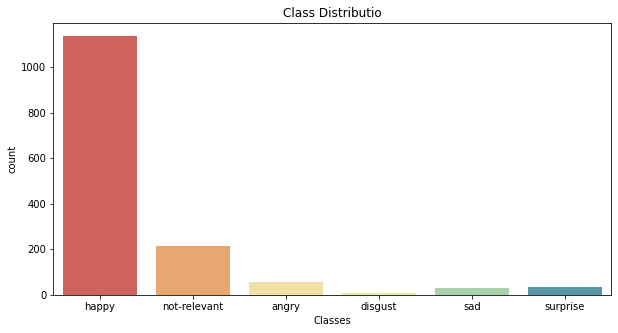

In [ ]:
# Looking at the class distributions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(df.category,palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distributio')

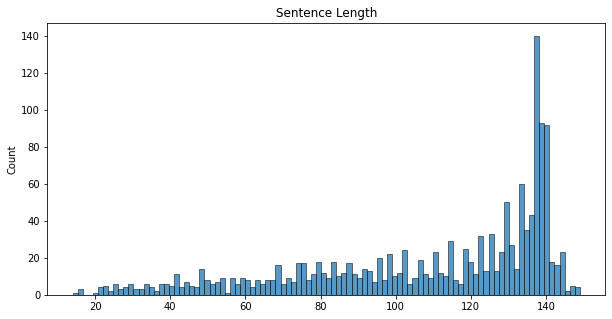

In [ ]:
# Plotting sentence length

plt.figure(figsize=(10,5))
sns.histplot([len(s) for s in df.text],bins=100)
plt.title('Sentence Length')
plt.show()

In [ ]:
max_len = max([len(sent) for sent in df.text])
print('Max Length : ',max_len)

Max Length :  149


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,df.label.values,test_size=0.15,random_state=17,stratify=df.label.values)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]
df.head()

,id,text,category,label,data_type
0,614484565059596288,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy,0,not_set
1,614746522043973632,@SelectShowcase @Tate_StIves ... Replace with ...,happy,0,not_set
2,614877582664835073,@Sofabsports thank you for following me back. ...,happy,0,not_set
3,611932373039644672,@britishmuseum @TudorHistory What a beautiful ...,happy,0,not_set
4,611570404268883969,@NationalGallery @ThePoldarkian I have always ...,happy,0,not_set


In [ ]:
df.loc[X_train,'data_type'] = 'train'
df.loc[X_val,'data_type'] = 'val'

df.groupby(['category','label','data_type']).count()

id  text
category     label data_type           
angry        2     train       48    48
                   val          9     9
disgust      3     train        5     5
                   val          1     1
happy        0     train      966   966
                   val        171   171
not-relevant 1     train      182   182
                   val         32    32
sad          4     train       27    27
                   val          5     5
surprise     5     train       30    30
                   val          5     5

In [ ]:
!pip install transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 163 kB 56.0 MB/s 
     |████████████████████████████████| 6.6 MB 14.6 MB/s 


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# encode train set

encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type=='train'].text.values,
                                                 add_special_tokens=True,
                                                 return_attention_mask=True,
                                                 pad_to_max_length=True,
                                                 max_length=256,
                                                 return_tensors='pt')

#encode validation set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].text.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')

In [ ]:
encoded_data_train

{'input_ids': tensor([[  101, 16092,  3897,  ...,     0,     0,     0],
        [  101,  1030, 27034,  ...,     0,     0,     0],
        [  101,  1030, 10682,  ...,     0,     0,     0],
        ...,
        [  101, 11047,  1030,  ...,     0,     0,     0],
        [  101,  1030,  3680,  ...,     0,     0,     0],
        [  101,  1030,  2120,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
encoded_data_train['input_ids'][0]

tensor([  101, 16092,  3897,  2007, 10098, 18982,  1001,  2293, 10105,  2015,
         1006,  2013,  1030,  2329,  7606, 14820,  8299,  1024,  1013,  1013,
         1056,  1012,  2522,  1013,  1053,  2549,  2595, 26760,  2140,  2692,
         2229,  2226,  1007,  8299,  1024,  1013,  1013,  1056,  1012,  2522,
         1013,  1044,  2692,  6777, 19279,  2497, 13088,  4160,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [ ]:
encoded_data_train['input_ids'][0].size

<built-in method size of Tensor object at 0x7f86b54a00b0>


In [ ]:
encoded_data_train['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
!pip install pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t_jt0w1e/pytorch_a99cf058c5e54fd9a004ea70cb278093/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t_jt0w1e/pytorch_a99cf058c5e54fd9a004ea70cb278093/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-ohp06i3n/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs f

In [ ]:
# train set
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

NameError: ignored